<a href="https://colab.research.google.com/github/rahmatrians/scratching-naive-bayes/blob/main/TB2_MATH_TOOLS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Kelompok 6 (Naive Bayes) :
- Rahmat Riansyah (41519010010)
- Ari Satria Wiratama  (41519010122)
- Abimanyu dwi satrio (41519010135)
- Dan Eliezer Ryan Andani (41519010120)
- Timotius Alvin (41519010003)

In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#memasukan data
datalatih = pd.read_excel("data_test.xlsx") #emmanggil file data
datalatih.head() #menampilkan data dari baris teratas

,Warna,Tipe,Asal,Tercuri
0,merah,Sport,Domestik,ya
1,merah,Sport,Domestik,tidak
2,merah,Sport,Domestik,ya
3,kuning,Sport,Domestik,tidak
4,kuning,Sport,Import,ya


In [12]:
#function untuk menyederhanakan data yang sama (alias data yang sejenis) pada column
def cutting(data):
    seen = set()
    seen_add = seen.add
    return [x for x in data if not (x in seen or seen_add(x))]

In [13]:
# 1
probColumnCount =  datalatih.groupby(datalatih.columns[-1])[datalatih.columns[-1]].count()
print(probColumnCount)

Tercuri
tidak    5
ya       5
Name: Tercuri, dtype: int64


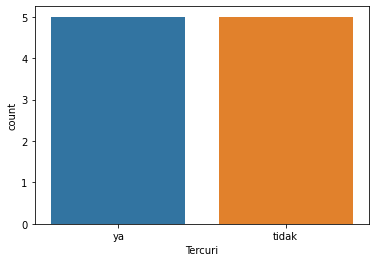

In [14]:
sns.countplot(x="Tercuri",data=datalatih)

In [15]:
probCol = cutting(datalatih['Tercuri']) #menyederhanakan data pada column terakhir
probCol

['ya', 'tidak']

In [16]:
lastColumn = datalatih.iloc[ :, -1:] #mengambil column terakhir untuk menentukan probabilitas

p1 = probColumnCount[0]/lastColumn.count() #menghitung probabilitas ke 1 yaitu n/jumlah
p2 = probColumnCount[1]/lastColumn.count() #menghitung probabilitas ke 2 yaitu n/jumlah

probColsDf = pd.DataFrame({'name': probCol, 'value': [p1,p2]}) #memasukkan hasil penghitungan ke dataframe
probColsDf

,name,value
0,ya,Tercuri 0.5 dtype: float64
1,tidak,Tercuri 0.5 dtype: float64


In [17]:
# warnaCount = datalatih.groupby(datalatih.columns[1])[datalatih.columns[1]].count()
# print(len))

In [18]:
#menghitung probabilitas pada setiap column selain column terakhir
columnsData = [] #untuk menyimpan hasil penghitungan

for x in range(len(datalatih.columns)-1) : #looping berdasarkan dari jumlah seluruh column dikurang 1
  v = cutting(datalatih.iloc[:, x]) #menyederhanakan data column
  tempData = [] #untuk menyimpan hasil penghitungan pada setiap column sementara waktu 
  get = datalatih.groupby(datalatih.columns[x])[datalatih.columns[x]].count() #menghitung jumlah data yang sama pada setiap column selain column terakhir
  # print(get)
  for z in range(len(get)) : #looping berdasarkan jumlah jenis data dari setiap column, misal column warna terdapat kurning dan merah. berarti terdapat 2 jenis data
    tempData.append(get.iloc[z]) #menyimpan total jenis data yang sama dari setiap column, misal jenis warna merah terdapat 5 yang sama di column warna 
 
  columnsData.append(tempData) #menyimpan seluruh hasil penghitungan total jenis data
  
print(columnsData)

[[5, 5], [6, 4], [5, 5]]


In [19]:
#function untuk menentukan hasil probabilitas dari pertanyaaan yang diajukan melalui arguments
def Question(data) :
  lastCol = cutting(datalatih.iloc[ :, -1]) #menyederhanakan data pada column terakhir
  totalColumn = len(datalatih.columns)-1 #menhitung total column dikurang 1

  prob1 = [] #menampung perhitungan probabilitas ke 1, P(X|Ci)
  prob2 = [] #menampung perhitungan  probabilitas ke 2, P(X|Ci)

  result1 = [] #menampung hasil persentase dari probabilitas ke 1
  result2 = [] #menampung hasil persentase dari probabilitas ke 1
  
  print("-- probability 1 untuk kemungkinan " + lastCol[0] + "--")
  for x in range(len(data)) : #looping berdasarkan jumlah banyaknya data dari arguments yang dikirim 
    newData = len(datalatih[(datalatih.iloc[ :, x] == data[x]) & (datalatih.iloc[ :, -1] == lastCol[0])]) #menghitung probabilitas ke-1 dari pertanyaan yang diajukan, misal menghitung probabilitas ya tercuri pada mobil warna merah, tipe SUV, dan asal domestik
    prob1.append(newData) #menyimpan hasil perhitungan probabilitas
    print("result dari " + data[x] + " adalah " + str(newData))

  
  for u in range(len(data)) : #looping berdasarkan jumlah banyaknya data dari arguments yang dikirim 
    result1.append(prob1[u] / probColumnCount[0]) #menyimpan hasil penghitungan P(X|Ci)
  
  result1 = probColsDf['value'][0] * np.prod(result1) #menentukan hasil akhir probabilitas ke-1
  result1 = "{:.0%}".format(float(result1)) #mengubah hasil akhir menjadi persentase
  print("kemungkinan  probability '" + lastCol[0] + "' adalah " + str(result1))

    

  
  print('\n\n')

  print("-- probability 2 untuk kemungkinan " + lastCol[1] + "--")
  for x in range(len(data)) : #looping berdasarkan jumlah banyaknya data dari arguments yang dikirim 
    newData = len(datalatih[(datalatih.iloc[ :, x] == data[x]) & (datalatih.iloc[ :, -1] == lastCol[1])])  #menghitung probabilitas ke-1 dari pertanyaan yang diajukan, misal menghitung probabilitas tidak tercuri pada mobil warna merah, tipe SUV, dan asal domestik
    prob2.append(newData) #menyimpan hasil perhitungan probabilitas
    print("result dari " + data[x] + " adalah " + str(newData))

  for u in range(len(data)) : #looping berdasarkan jumlah banyaknya data dari arguments yang dikirim 
    result2.append(prob2[u] / probColumnCount[1]) #menyimpan hasil penghitungan P(X|Ci)
  
  result2 = probColsDf['value'][0] * np.prod(result2) #menentukan hasil akhir probabilitas ke-1
  result2 = "{:.0%}".format(float(result2)) #mengubah hasil akhir menjadi persentase
  print("kemungkinan  probability '" + lastCol[1] + "' adalah " + str(result2))





data = ['merah', 'Suv', 'Domestik'] #data untuk mengajukan pertanyaan
Question(data) #mengajukan pertanyaaan probabilitas

-- probability 1 untuk kemungkinan ya--
result dari merah adalah 3
result dari Suv adalah 1
result dari Domestik adalah 2
kemungkinan  probability 'ya' adalah 2%



-- probability 2 untuk kemungkinan tidak--
result dari merah adalah 2
result dari Suv adalah 3
result dari Domestik adalah 3
kemungkinan  probability 'tidak' adalah 7%
